In [1]:
# The dataset is obtained from kaggle.
#(https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data/discussion).
#In the data set, we have product wise Sales for Multiple outlets of a chain.The data consists of 8253 rows and 12 columns.

#Columns

#Item_Identifier: Unique product ID

#Item_Weight: Product Weight

#Item_Fat_Content: Whether the product is low fat or not

#Item_Visibility: The % of total display area of all products in a store allocated to the particular product

#Item_Type: Product Category

#Item_MRP: Product MRP 

#Outlet_Identifier: Unique store ID

#Outlet_Establishment_Year: The year in which store was established

#Outlet_Size: The size of the store in terms of ground area covered

#Outlet_Location_Type: The type of city in which the store is located

#Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

#Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable which we are going to predict.

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df_train=pd.read_csv('bigmart-sales-data/Train.csv')


In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_train.shape

(8523, 12)

In [7]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df_train.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
round(100*(df_train.isnull().sum()/len(df_train.index)),2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

In [12]:
from pandas import Series

In [13]:
from sklearn.utils import shuffle

In [14]:
df_train=shuffle(df_train)

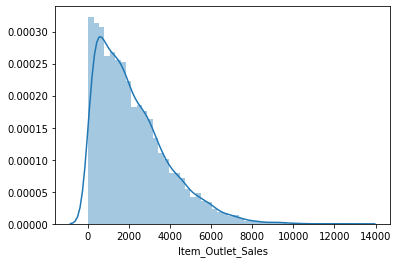

In [15]:
import seaborn as sns
sns.distplot(df_train['Item_Outlet_Sales'])
plt.show()

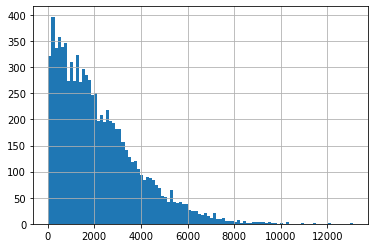

In [16]:
df_train['Item_Outlet_Sales'].hist(bins = 100)

In [17]:
#Numeric Independent Variables

In [18]:
d=[]
for x in df_train.columns:
    if(df_train.dtypes[x]!=object):
        d.append(x)


In [19]:
d

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

Item_Weight


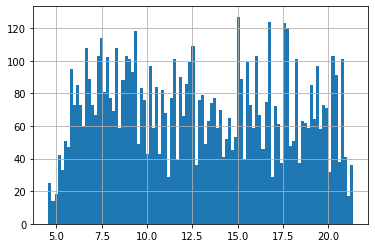

Item_Visibility


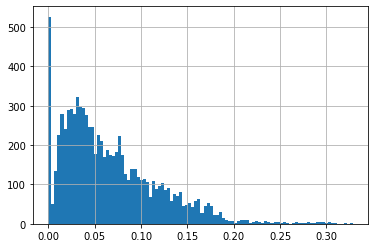

Item_MRP


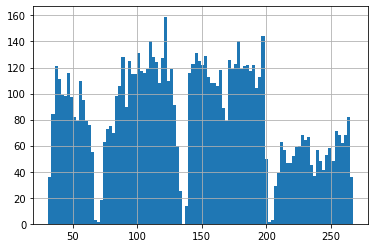

Outlet_Establishment_Year


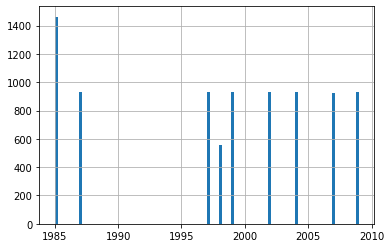

Item_Outlet_Sales


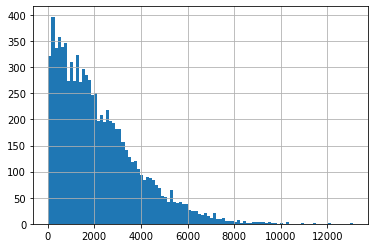

In [20]:
for x in d:
        print(x)
        df_train[x].hist(bins = 100)
        plt.show()

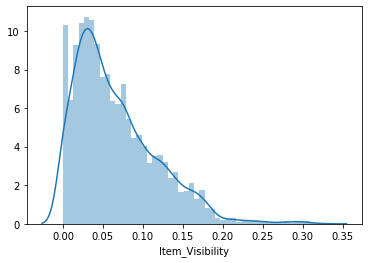

In [21]:
sns.distplot(df_train['Item_Visibility'])
plt.show()

In [22]:
#Visualisation of categorical variables

Text(0, 0.5, 'Mean')

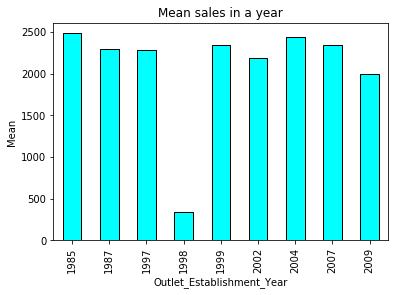

In [23]:
df_train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar(color='cyan',edgecolor='black')
plt.title('Mean sales in a year')
plt.ylabel('Mean')

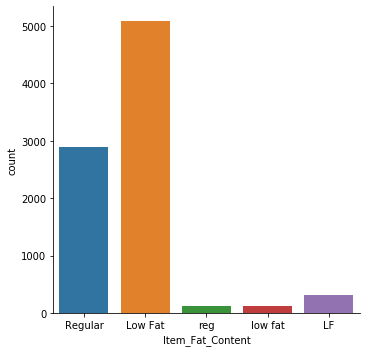

In [24]:
sns.catplot(x="Item_Fat_Content", kind="count", data=df_train)

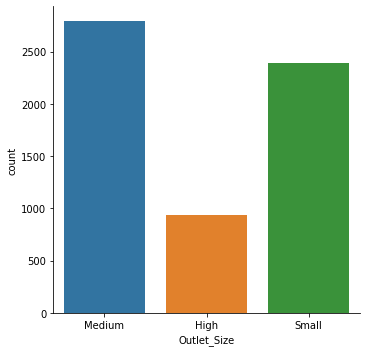

In [25]:
sns.catplot(x="Outlet_Size", kind="count", data=df_train)

In [26]:
#here Lf and reg refer to low fat and regular respectively, so they need to be grouped together

In [27]:
#Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
l=LinearRegression()

In [30]:
X=df_train.loc[:,['Outlet_Establishment_Year','Item_MRP']]
X

,Outlet_Establishment_Year,Item_MRP
2409,2007,102.4990
2625,2007,118.3808
6334,1985,248.0460
2371,1987,180.4660
6963,2007,46.8034
...,...,...
6686,1999,93.5120
2160,1999,219.8114
1599,1985,124.9730
4914,1987,110.3570


In [31]:
y=df_train['Item_Outlet_Sales']
y

2409    2579.9750
2625    2812.3392
6334    7883.0720
2371    3415.5540
6963     923.4646
          ...    
6686    1677.8160
2160    1108.5570
1599    2463.4600
4914    2087.2830
7727    2432.1674
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#split into train and test set

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)

In [35]:
#split into train and validation set

In [36]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [37]:
l.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print(l.predict(x_test))

[4185.40953372 1565.35407035 1726.27424951 ... 2454.59814513 2301.3597052
 1921.05169456]


In [39]:
p=l.predict(x_test)
print(np.mean(p-y_test)**2)

1897.5647177797678


In [40]:
l.score(x_test,y_test)

0.3313847456873067

In [41]:
#data preprocessing

In [42]:
df_train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [43]:
df_train['Outlet_Establishment_Year']=2019-df_train['Outlet_Establishment_Year']

In [44]:
df_train['Item_Visibility']=df_train['Item_Visibility'].replace(0,np.mean(df_train['Item_Visibility']))

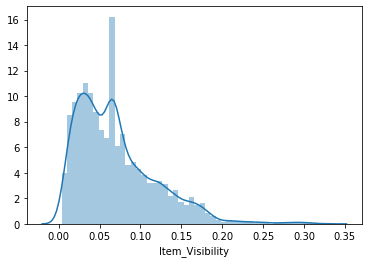

In [45]:
sns.distplot(df_train['Item_Visibility'])
plt.show()

In [46]:
df_train['Item_Weight'].fillna((df_train['Item_Weight'].mean()), inplace=True)
df_train['Outlet_Size'].fillna('Small',inplace=True)

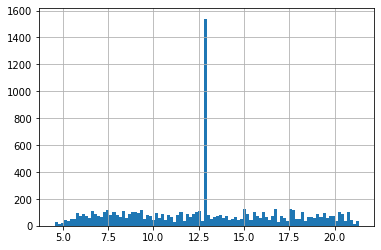

In [47]:
df_train['Item_Weight'].hist(bins = 100)

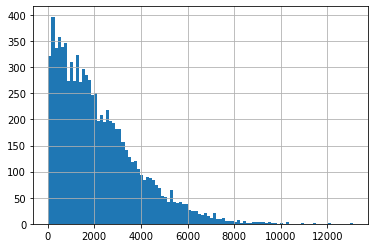

In [48]:
df_train['Item_Outlet_Sales'].hist(bins = 100)

In [49]:
df_train['Item_Fat_Content'].unique()

array(['Regular', 'Low Fat', 'reg', 'low fat', 'LF'], dtype=object)

In [50]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

In [51]:
df_train['Item_Fat_Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

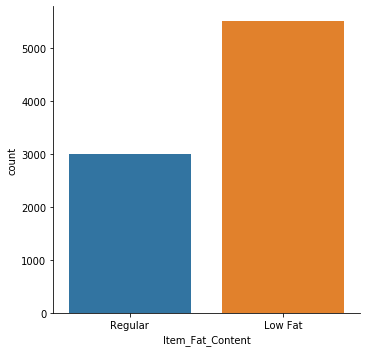

In [52]:
sns.catplot(x="Item_Fat_Content", kind="count", data=df_train)

In [53]:
df_train['Item_Type'].unique()

array(['Breads', 'Canned', 'Frozen Foods', 'Fruits and Vegetables',
       'Baking Goods', 'Snack Foods', 'Soft Drinks', 'Household',
       'Health and Hygiene', 'Meat', 'Others', 'Starchy Foods', 'Dairy',
       'Hard Drinks', 'Breakfast', 'Seafood'], dtype=object)

In [54]:
seclist = list(df_train.select_dtypes(include=['object']).columns)

dummies = pd.get_dummies(df_train[seclist], prefix= seclist)

df_train.drop(seclist, axis=1, inplace = True)

X = pd.concat([df_train,dummies], axis =1 )

In [55]:
l=LinearRegression()

In [56]:
x=df_train.drop('Item_Outlet_Sales',1)
y=df_train['Item_Outlet_Sales']

In [57]:
y

2409    2579.9750
2625    2812.3392
6334    7883.0720
2371    3415.5540
6963     923.4646
          ...    
6686    1677.8160
2160    1108.5570
1599    2463.4600
4914    2087.2830
7727    2432.1674
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
from  sklearn.preprocessing  import StandardScaler
slc= StandardScaler()
x_train = slc.fit_transform(x_train)
x_test = slc.transform(x_test)


In [60]:
from sklearn.model_selection import KFold

In [61]:
seed = 0
num_folds=10
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=num_folds, random_state=seed)

In [62]:
l.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print(l.predict(x_test))

[1331.08884255  356.31727269 2498.90806537 ... 2823.98250928 2279.38561652
 2578.37257857]


In [64]:
p=l.predict(x_test)
print(np.mean(p-y_test)**2)

814.9792509191649


In [65]:
l.score(x_test,y_test)

0.33441021715803654

In [66]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [67]:
r=Ridge(alpha='0.03',normalize=True)


In [68]:
r.fit(x_train,y_train)

Ridge(alpha='0.03', copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [69]:
print(r.predict(x_test))

[1356.86809868  410.70384614 2488.70612667 ... 2804.91918028 2276.24438637
 2566.39140016]


In [70]:
p=r.predict(x_test)
print(np.mean((p-y_test)**2))

1839308.3231629396
